In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [55]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)          # Set now of columns visible to 100
pd.set_option('display.max_rows',100)          # Set now of rows visible to 100

In [56]:
df_raw=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/9_spaceship_titanic/Dataset/train.csv")
df=df_raw.copy()

In [57]:
df.shape

(8693, 14)

In [58]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

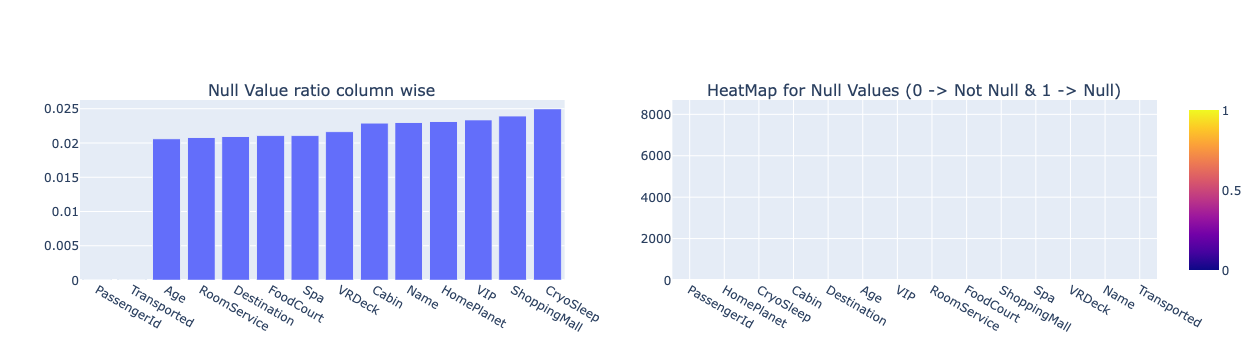

In [60]:
fig= make_subplots(rows=1,cols=2,
                  subplot_titles=("Null Value ratio column wise", "HeatMap for Null Values (0 -> Not Null & 1 -> Null)")
                  )



temp_data= df.isna().mean().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=1
)

fig.add_trace(px.imshow(
                        df.isna().astype(np.int8)
                       ).data[0], 
              row=1,col=2)

fig.update_layout(showlegend=False)
fig.show()

In [61]:
df['GroupId']=df['PassengerId'].str[:4].astype(np.int16)
df['PassengerNumber']=df['PassengerId'].str[5:].astype(np.int16)

df.drop(columns='PassengerId',inplace=True)

In [62]:
df['Deck']=df["Cabin"].str.split("/").str[0]
df['Num']=df["Cabin"].str.split("/").str[1]
df['Side']=df["Cabin"].str.split("/").str[2]

df.drop(columns='Cabin',inplace=True)

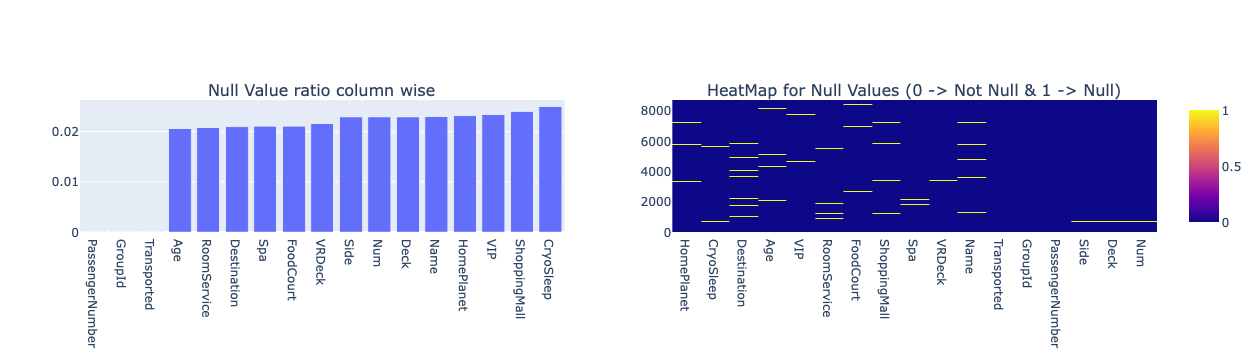

In [72]:
fig= make_subplots(rows=1,cols=2,
                  subplot_titles=("Null Value ratio column wise", "HeatMap for Null Values (0 -> Not Null & 1 -> Null)")
                  )



temp_data= df.isna().mean().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=1
)

fig.add_trace(px.imshow(
                        df.isna().astype(np.int8)
                       ).data[0], 
              row=1,col=2)

fig.update_layout(showlegend=False)
fig.show()

In [73]:
df.nunique().sort_values()

CryoSleep             2
VIP                   2
Side                  2
Transported           2
HomePlanet            3
Destination           3
Deck                  8
PassengerNumber       8
Age                  80
ShoppingMall       1115
RoomService        1273
VRDeck             1306
Spa                1327
FoodCourt          1507
Num                1817
GroupId            6217
Name               8473
dtype: int64

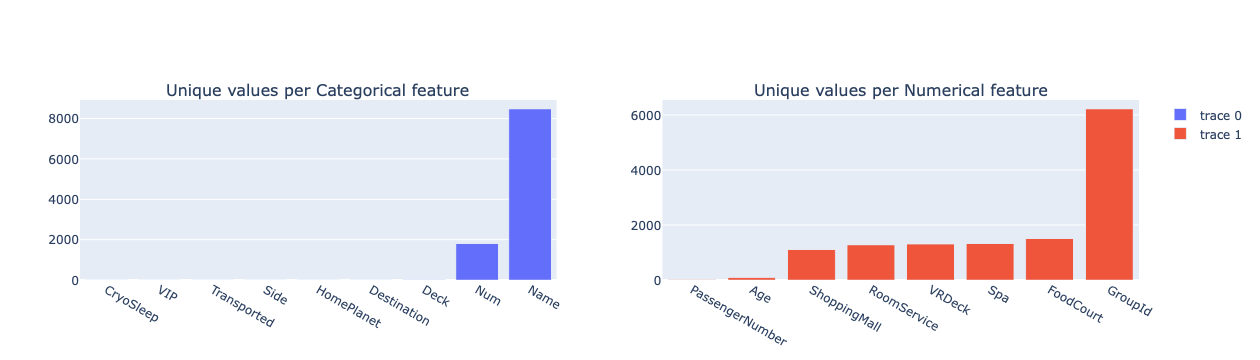

In [74]:
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Unique values per Categorical feature", "Unique values per Numerical feature"))


temp_data=df.select_dtypes(exclude="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=1
)



temp_data=df.select_dtypes(include="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=2
)

#fig.update_layout(showlegend=False)
fig.show()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HomePlanet       8492 non-null   object 
 1   CryoSleep        8476 non-null   object 
 2   Destination      8511 non-null   object 
 3   Age              8514 non-null   float64
 4   VIP              8490 non-null   object 
 5   RoomService      8512 non-null   float64
 6   FoodCourt        8510 non-null   float64
 7   ShoppingMall     8485 non-null   float64
 8   Spa              8510 non-null   float64
 9   VRDeck           8505 non-null   float64
 10  Name             8493 non-null   object 
 11  Transported      8693 non-null   bool   
 12  GroupId          8693 non-null   int16  
 13  PassengerNumber  8693 non-null   int16  
 14  Side             8494 non-null   object 
 15  Deck             8494 non-null   object 
 16  Num              8494 non-null   object 
dtypes: bool(1), fl

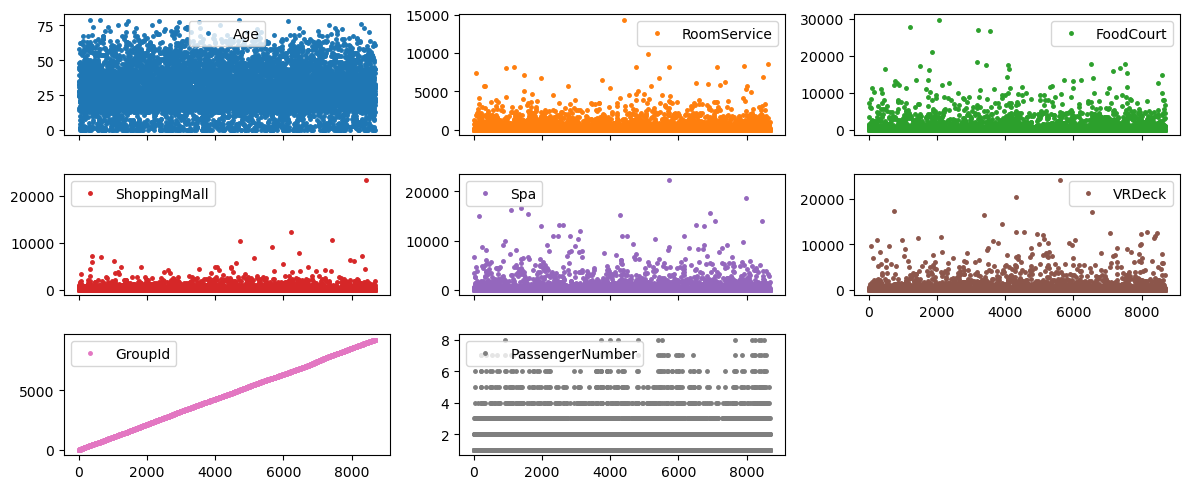

In [77]:
# For all Numerical columnn for all rows 
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,5), markersize=5)
plt.tight_layout()

In [85]:
df[['GroupId','Transported']].value_counts()

1.239378386084973